# Final Data Assessment:

In [1]:
import tensorflow as tf
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
import time

In [2]:
from vanilla_model import VanillaModel
from load_data import load_folder

Load the dataset:

In [3]:
sample_size = 10
labels, test_image_paths, lti = load_folder("../dataset/processed_images/test/")

In [4]:
test_image_paths = test_image_paths[:10]

In [5]:
lti

{'EOSINOPHIL': 0, 'NEUTROPHIL': 1, 'MONOCYTE': 2, 'LYMPHOCYTE': 3}

In [12]:
test_image_paths

['../dataset/processed_images/test/EOSINOPHIL_56_8186.jpg',
 '../dataset/processed_images/test/NEUTROPHIL_39_6804.jpg',
 '../dataset/processed_images/test/EOSINOPHIL_61_6351.jpg',
 '../dataset/processed_images/test/MONOCYTE_13_279.jpg',
 '../dataset/processed_images/test/LYMPHOCYTE_20_6762.jpg',
 '../dataset/processed_images/test/EOSINOPHIL_42_1525.jpg',
 '../dataset/processed_images/test/NEUTROPHIL_16_8276.jpg',
 '../dataset/processed_images/test/NEUTROPHIL_151_6230.jpg',
 '../dataset/processed_images/test/EOSINOPHIL_70_3782.jpg',
 '../dataset/processed_images/test/EOSINOPHIL_23_6123.jpg']

In [10]:
def normalize(X):
    mean = np.mean(X)
    std = np.std(X)
    N = X.size
    adjusted_stddev = max(std, 1.0/np.sqrt(N))
    fOp = np.vectorize(lambda x: (x-mean)/adjusted_stddev)
    return fOp(X)

In [11]:
def load_image(path):
    label = path.split("/")[-1].split("_")[0]
    img = Image.open(path)
    np_ar = np.array(img)
    plt.figure()
    plt.title(label)
    plt.imshow(np_ar)
    return label, normalize(np_ar), np_ar
    

Format Test Set

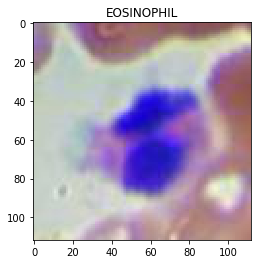

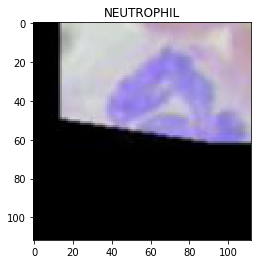

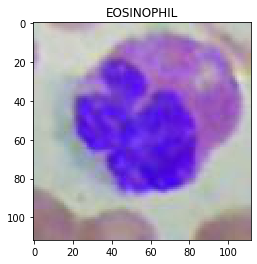

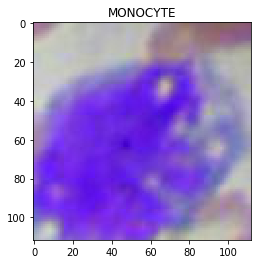

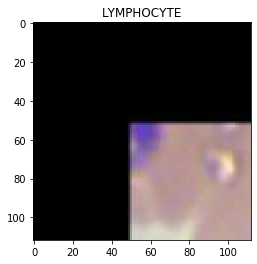

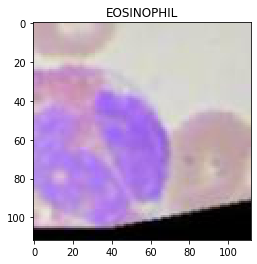

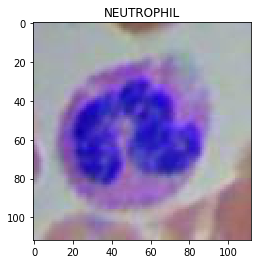

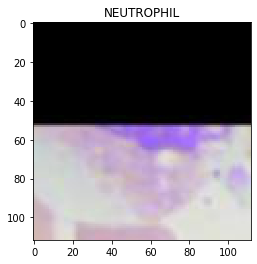

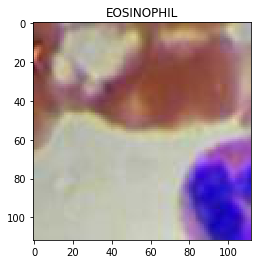

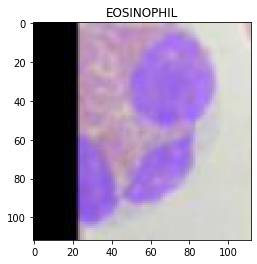

In [13]:
inputs = []
ground_truths = []
orig_imgs = []
for p in test_image_paths:
    y, x, o = load_image(p)
    inputs.append(x)
    ground_truths.append(y)
    orig_imgs.append(o)
inputs = np.array(inputs).astype(np.float32)
ground_truths = np.array(ground_truths)

Import Model:

In [14]:
model = VanillaModel()
model.load_weights("model_save/checkpoint")

In [17]:
outputs = model.predict(inputs)
ids = np.argmax(outputs, axis=1) 

{'EOSINOPHIL': 0, 'NEUTROPHIL': 1, 'MONOCYTE': 2, 'LYMPHOCYTE': 3}


In [22]:
def compare(orig, truth, prediction):
    plt.figure()
    judgement = ""
    if truth == prediction:
        judgement = "Correct!"
    else:
        judgement = "Wrong"
    plt.title(str(truth) + "-" + str(prediction)+" "+judgement)
    plt.imshow(orig)

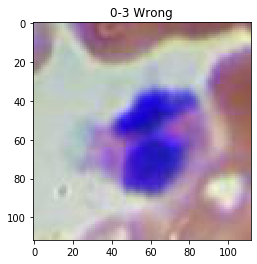

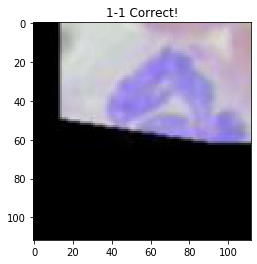

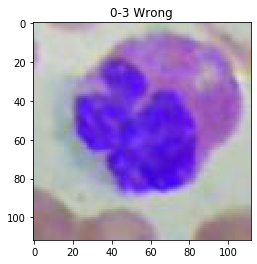

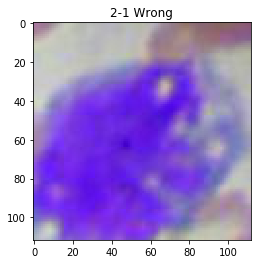

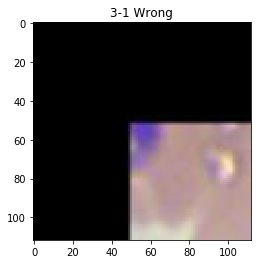

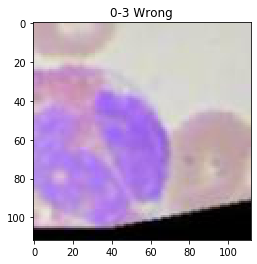

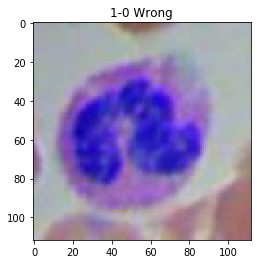

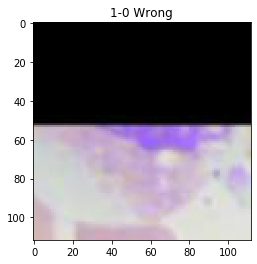

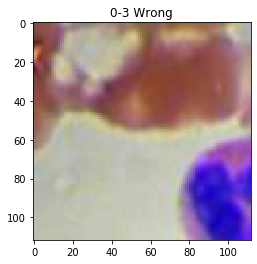

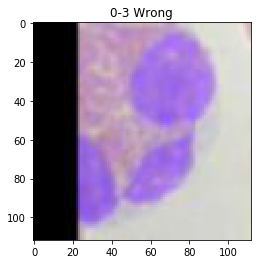

In [24]:
for i in range(len(orig_imgs)):
    compare(orig_imgs[i],lti[ground_truths[i]],ids[i])